<a href="https://colab.research.google.com/github/br10cf/EEG-epilepsy-classifier/blob/main/EEG_Classifier_august_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e baixando o arquivo "sinais.zip" com todos os sinais de EEG

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import use
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.io import savemat
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import scipy.stats

In [ ]:
# Uploading sinais.zip file
from google.colab import files
uploaded_files = files.upload()

Saving sinais.zip to sinais.zip


In [ ]:
!unzip sinais.zip # Unzipping

Archive:  sinais.zip
   creating: sinais/
   creating: sinais/setA/
  inflating: sinais/setA/Z001.txt    
  inflating: sinais/setA/Z002.txt    
  inflating: sinais/setA/Z003.txt    
  inflating: sinais/setA/Z004.txt    
  inflating: sinais/setA/Z005.txt    
  inflating: sinais/setA/Z006.txt    
  inflating: sinais/setA/Z007.txt    
  inflating: sinais/setA/Z008.txt    
  inflating: sinais/setA/Z009.txt    
  inflating: sinais/setA/Z010.txt    
  inflating: sinais/setA/Z011.txt    
  inflating: sinais/setA/Z012.txt    
  inflating: sinais/setA/Z013.txt    
  inflating: sinais/setA/Z014.txt    
  inflating: sinais/setA/Z015.txt    
  inflating: sinais/setA/Z016.txt    
  inflating: sinais/setA/Z017.txt    
  inflating: sinais/setA/Z018.txt    
  inflating: sinais/setA/Z019.txt    
  inflating: sinais/setA/Z020.txt    
  inflating: sinais/setA/Z021.txt    
  inflating: sinais/setA/Z022.txt    
  inflating: sinais/setA/Z023.txt    
  inflating: sinais/setA/Z024.txt    
  inflating: sinais/

## Organização dos datasets e criação de arquivos .csv de cada sinal

In [ ]:
files_set_A = glob.glob('./sinais/setA/*')
files_set_B = glob.glob('./sinais/setB/*')
files_set_C = glob.glob('./sinais/setC/*')
files_set_D = glob.glob('./sinais/setD/*')
files_set_E = glob.glob('./sinais/setE/*')

In [ ]:
files_set = [files_set_A, files_set_B, files_set_C, files_set_D, files_set_E]

In [ ]:
%%capture
# Impede que a célula fique mostrando os outputs

def build_dataframe_from_txt(files_path):
    df = pd.DataFrame()
    for file in files_path:
        f = open(file, "r")
        signal = f.readlines()
        signal = [int(linha.strip()) for linha in signal]
        df = df.append([signal])
    return df

for i in range(0,len(files_set)):
  df = build_dataframe_from_txt(files_set[i])
  df.reset_index(inplace=True, drop=True)
  # df.head(5)
  file_name="conjunto_"+str(files_set[i][1])[-10]+".csv"
  df.to_csv(file_name, index=False)


## Criação das Features

In [ ]:
def fft_sinais(file, fs = 1):
  if fs == 1:
    fs = 173.61
  N = len(file.sum())
  yf = fft(file.sum())
  xf = fftfreq(N, 1 / fs)
  return yf,xf

# plt.plot(xf, np.abs(yf))

# Abrindo os arquivos e fazendo algumas análises descritivas

In [ ]:
setA = pd.read_csv('conjunto_A.csv')
setB = pd.read_csv('conjunto_B.csv')
setC = pd.read_csv('conjunto_C.csv')
setD = pd.read_csv('conjunto_D.csv')
setE = pd.read_csv('conjunto_E.csv')

setA

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-40,-13,43,69,55,12,7,28,39,19,...,36,67,79,77,40,9,-10,-21,-26,28
1,24,10,-9,-18,-9,-3,-2,-2,-9,-9,...,29,3,-17,-14,-21,-29,-39,-33,-28,-19
2,0,2,-1,14,36,60,80,84,86,78,...,3,6,17,26,34,38,32,23,21,-16
3,20,21,19,12,13,5,15,4,12,7,...,32,53,59,61,56,58,51,39,18,30
4,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,...,61,39,23,42,45,57,43,21,17,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-37,-22,-17,-24,-31,-20,-5,14,31,31,...,-91,-52,-23,-14,-5,-3,7,3,4,82
96,-30,-34,-33,5,31,62,69,36,1,-29,...,31,-9,-37,-48,-18,-3,3,1,-20,-27
97,-21,-29,-34,-34,-44,-58,-68,-69,-63,-57,...,10,14,4,5,11,26,26,18,6,25
98,-19,-39,-41,-16,5,14,6,-5,-20,-23,...,0,3,16,33,48,55,67,60,46,46


Vamos plotar todos os participantes (n=100) de cada grupo (A, B, C, D e E) e analisar as diferenças nos sinais.
* Cada linha é o registro de um eletrodo de um participante

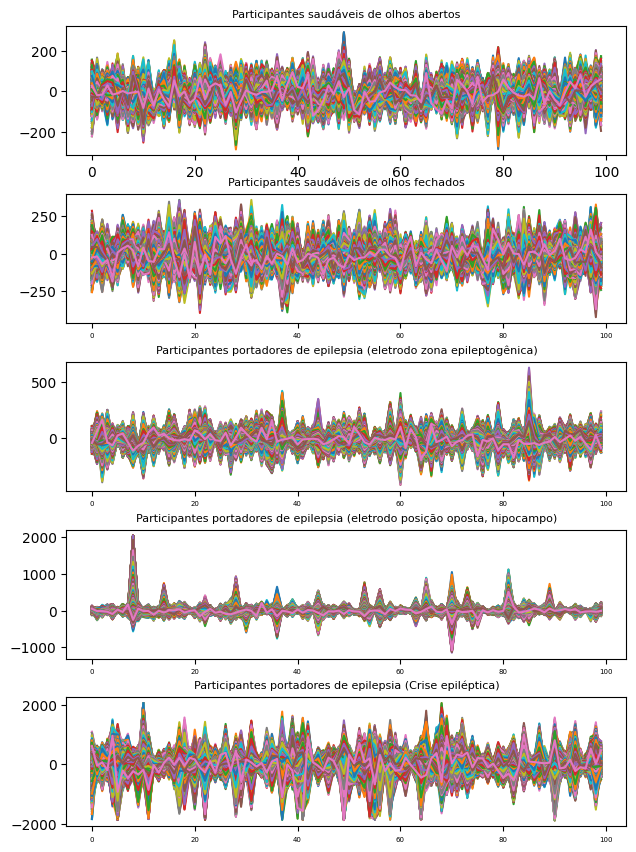

In [ ]:
files_set = [setA, setB, setC, setD, setE]

plt.figure(figsize=(8,4))

files_set_list = ['Participantes saudáveis de olhos abertos', \
                  'Participantes saudáveis de olhos fechados', \
                  'Participantes portadores de epilepsia (eletrodo zona epileptogênica)', \
                  'Participantes portadores de epilepsia (eletrodo posição oposta, hipocampo)',
                  'Participantes portadores de epilepsia (Crise epiléptica)']

for i in range(len(files_set)):
  file = files_set[i]
  # mean_files = files_set[i].mean(axis=1)
  files = files_set[i]
  ax = plt.subplot(5,1,i+1)
  ax.set_title(files_set_list[i], fontsize=8)
  plt.plot(files)
  plt.rc('xtick', labelsize=5)

plt.subplots_adjust(left=0.3,
                    bottom=0,
                    right=1.0,
                    top=2,
                    wspace=0.4,
                    hspace=0.3)

Podemos ver que os sinais dos participantes epilépticos são muito diferentes dos partiticipantes saudáveis. Isso se deve pela alta intensidade (tanto em frequência quanto em magnitude) dos disparos neuronais, que caracteriza esse transtorno.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

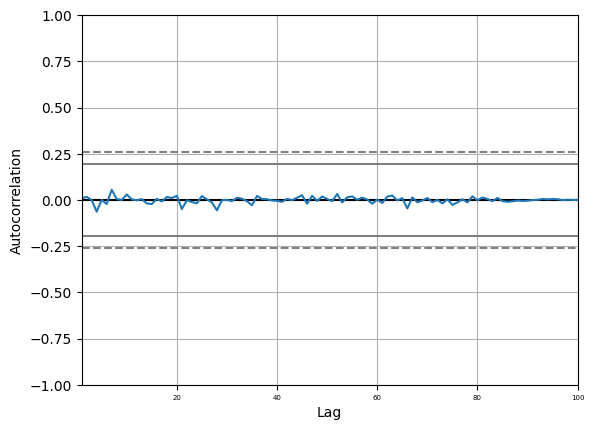

In [ ]:
# Autocorrelação do sinal de participantes saudáveis de olhos abertos: sinal pouco correlacionado (pouco periódico)
pd.plotting.autocorrelation_plot(setA)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

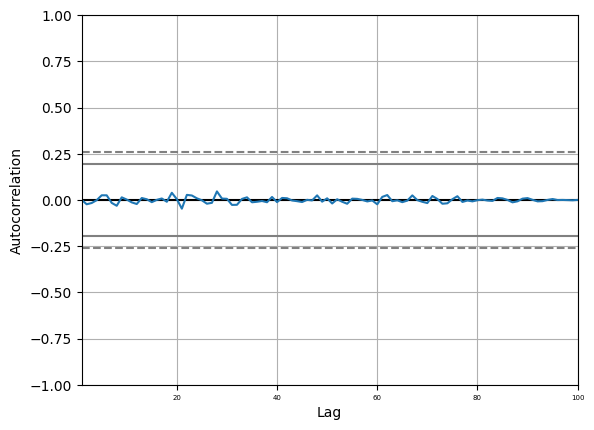

In [ ]:
# Autocorrelação do sinal de participantes saudáveis de olhos fechados: sinal pouco relacionado (pouco periódico)
pd.plotting.autocorrelation_plot(setB)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

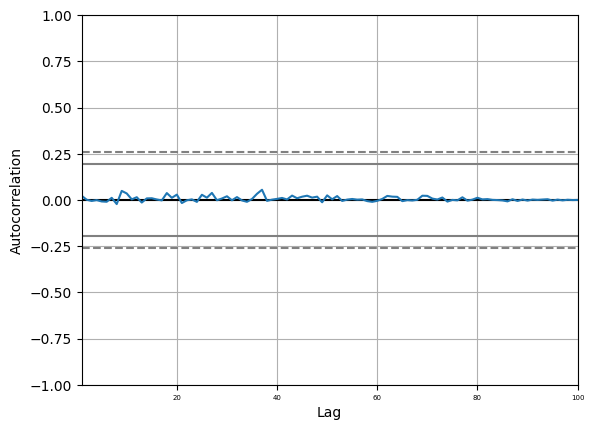

In [ ]:
# Autocorrelação do sinal de participantes epilépticos na zona epileptogênica: sinal pouco relacionado (pouco periódico)
pd.plotting.autocorrelation_plot(setC)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

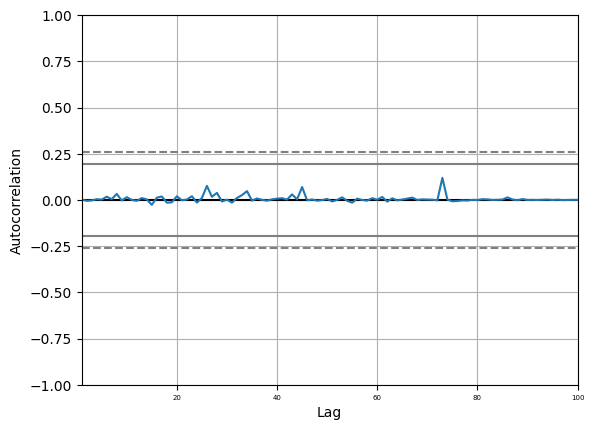

In [ ]:
# Autocorrelação do sinal de participantes epilépticos com eletrodo na região oposta da zona epileptogênica:
# sinal pouco relacionado (pouco periódico), mas existem algumas regiões de similaridade (provavelmente são as regiões de maiores picos)
pd.plotting.autocorrelation_plot(setD)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

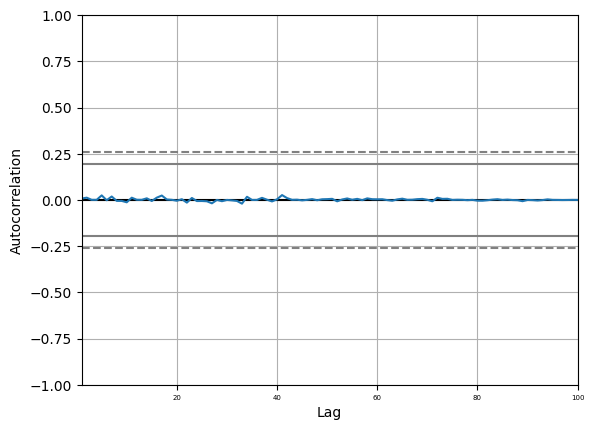

In [ ]:
# Autocorrelação do sinal de participantes epilépticos em crise epiléptica: sinal nada relacionado
# Reflete a natureza de diversos disparos dessincronizados do EEG
pd.plotting.autocorrelation_plot(setE)

Estatística descritiva dos dados (considerando cada participante, n =100)

In [ ]:
set_A = setA.transpose()
set_A.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,...,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,5.049548,10.624359,7.651208,1.838907,2.275079,8.561386,-6.216500,-51.346351,5.647547,-27.369539,...,1.610935,-52.259214,6.471809,-2.053210,1.684403,12.705150,8.546986,8.029778,3.096656,5.362704
std,50.198660,43.240083,31.220723,41.409622,37.784329,48.076256,36.995569,40.298246,45.246280,43.705649,...,49.807074,22.476272,45.198545,52.056878,36.533692,47.150544,47.673018,29.048091,55.744784,48.754114
min,-223.000000,-140.000000,-99.000000,-168.000000,-139.000000,-202.000000,-142.000000,-206.000000,-183.000000,-190.000000,...,-184.000000,-124.000000,-139.000000,-200.000000,-147.000000,-146.000000,-208.000000,-92.000000,-180.000000,-196.000000
25%,-27.000000,-19.000000,-12.000000,-24.000000,-23.000000,-23.000000,-30.000000,-77.000000,-23.000000,-57.000000,...,-30.000000,-68.000000,-25.000000,-34.000000,-22.000000,-18.000000,-24.000000,-11.000000,-34.000000,-26.000000
50%,6.000000,9.000000,8.000000,3.000000,1.000000,9.000000,-6.000000,-51.000000,5.000000,-29.000000,...,1.000000,-52.000000,6.000000,-1.000000,1.000000,13.000000,8.000000,8.000000,1.000000,7.000000
75%,36.000000,40.000000,28.000000,29.000000,28.000000,39.000000,18.000000,-24.000000,36.000000,0.000000,...,32.000000,-37.000000,37.000000,33.000000,25.000000,44.000000,41.000000,27.000000,38.000000,39.000000
max,158.000000,168.000000,109.000000,146.000000,139.000000,188.000000,135.000000,71.000000,176.000000,122.000000,...,169.000000,17.000000,168.000000,192.000000,117.000000,184.000000,178.000000,129.000000,205.000000,175.000000


In [ ]:
set_B = setB.transpose()
set_B.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,...,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,5.623139,-3.676593,-18.112033,7.604345,-75.941176,-4.037588,56.224066,56.330242,7.612643,-13.830608,...,-5.549915,56.486209,7.956554,-51.783012,-51.902368,-5.328289,8.519893,4.809617,-18.490115,-52.196729
std,76.720176,42.967842,68.665220,50.250922,48.667982,56.426438,46.982684,39.021823,57.388556,61.911251,...,45.923228,46.520859,65.482278,55.816227,75.472753,50.886524,51.230633,89.236097,102.888517,57.529623
min,-257.000000,-188.000000,-256.000000,-177.000000,-250.000000,-211.000000,-100.000000,-84.000000,-222.000000,-260.000000,...,-178.000000,-98.000000,-270.000000,-226.000000,-302.000000,-182.000000,-148.000000,-259.000000,-424.000000,-242.000000
25%,-44.000000,-32.000000,-66.000000,-28.000000,-107.000000,-39.000000,24.000000,30.000000,-28.000000,-54.000000,...,-36.000000,24.000000,-33.000000,-88.000000,-101.000000,-39.000000,-27.000000,-59.000000,-89.000000,-90.000000
50%,6.000000,-4.000000,-22.000000,7.000000,-75.000000,-5.000000,55.000000,54.000000,7.000000,-15.000000,...,-5.000000,56.000000,9.000000,-52.000000,-56.000000,-5.000000,8.000000,5.000000,-21.000000,-51.000000
75%,56.000000,24.000000,24.000000,42.000000,-45.000000,32.000000,86.000000,82.000000,45.000000,27.000000,...,24.000000,87.000000,50.000000,-16.000000,-5.000000,28.000000,42.000000,69.000000,53.000000,-15.000000
max,287.000000,149.000000,229.000000,200.000000,114.000000,194.000000,260.000000,199.000000,214.000000,201.000000,...,173.000000,228.000000,226.000000,176.000000,278.000000,182.000000,208.000000,313.000000,329.000000,206.000000


In [ ]:
set_C = setC.transpose()
set_C.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,...,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,-16.462534,-3.262631,-8.737857,-0.097632,-17.790090,19.650964,-6.296803,-37.249451,-15.781792,-76.350256,...,-32.617037,-14.545521,14.933122,-8.623139,0.296803,28.515743,-16.949719,5.303149,-7.310227,27.598975
std,33.240169,70.113547,82.275583,66.833970,49.333362,30.937267,51.041911,37.132000,66.740583,19.587235,...,45.772088,55.933632,32.577790,77.280173,43.913225,43.986291,40.378010,73.385113,35.945409,42.338186
min,-139.000000,-228.000000,-389.000000,-277.000000,-226.000000,-73.000000,-173.000000,-167.000000,-261.000000,-162.000000,...,-183.000000,-213.000000,-131.000000,-288.000000,-175.000000,-165.000000,-168.000000,-260.000000,-138.000000,-128.000000
25%,-38.000000,-48.000000,-65.000000,-39.000000,-49.000000,-1.000000,-37.000000,-59.000000,-57.000000,-89.000000,...,-64.000000,-52.000000,-4.000000,-57.000000,-30.000000,10.000000,-44.000000,-40.000000,-28.000000,0.000000
50%,-18.000000,-7.000000,-8.000000,1.000000,-15.000000,19.000000,-7.000000,-37.000000,-18.000000,-76.000000,...,-34.000000,-17.000000,15.000000,-9.000000,2.000000,36.000000,-18.000000,5.000000,-6.000000,27.000000
75%,5.000000,41.000000,49.000000,41.000000,15.000000,41.000000,28.000000,-13.000000,26.000000,-63.000000,...,-3.000000,23.000000,36.000000,42.000000,31.000000,56.000000,8.000000,53.000000,15.000000,54.000000
max,110.000000,240.000000,219.000000,251.000000,132.000000,118.000000,153.000000,108.000000,231.000000,-1.000000,...,127.000000,184.000000,112.000000,212.000000,117.000000,149.000000,126.000000,223.000000,129.000000,236.000000


In [ ]:
set_D = setD.transpose()
set_D.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,...,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,10.959727,-16.297779,-7.415670,23.180864,-16.458140,13.318282,0.328533,12.056871,-6.316817,5.626312,...,-38.078594,-0.335367,28.803759,2.891872,-2.285819,-27.657310,0.358555,-28.306078,7.294606,13.973395
std,39.024633,54.429729,46.062005,46.533015,61.773656,26.067993,52.471532,63.226388,440.071186,88.125575,...,24.194689,66.906187,23.366508,20.677827,59.378590,38.723002,20.694251,32.093941,66.390898,38.408787
min,-125.000000,-265.000000,-187.000000,-128.000000,-240.000000,-73.000000,-174.000000,-202.000000,-569.000000,-291.000000,...,-119.000000,-248.000000,-46.000000,-95.000000,-254.000000,-180.000000,-63.000000,-298.000000,-305.000000,-152.000000
25%,-17.000000,-42.000000,-39.000000,-6.000000,-58.000000,-3.000000,-32.000000,-31.000000,-245.000000,-54.000000,...,-54.000000,-47.000000,13.000000,-11.000000,-41.000000,-52.000000,-14.000000,-44.000000,-32.000000,-10.000000
50%,11.000000,-6.000000,-6.000000,22.000000,-20.000000,13.000000,0.000000,13.000000,-146.000000,6.000000,...,-38.000000,1.000000,29.000000,2.000000,-3.000000,-28.000000,0.000000,-24.000000,7.000000,12.000000
75%,40.000000,21.000000,24.000000,53.000000,23.000000,30.000000,35.000000,55.000000,34.000000,65.000000,...,-21.000000,44.000000,45.000000,16.000000,35.000000,-3.000000,15.000000,-8.000000,50.000000,37.000000
max,132.000000,99.000000,157.000000,166.000000,179.000000,102.000000,180.000000,204.000000,2047.000000,259.000000,...,31.000000,236.000000,94.000000,80.000000,186.000000,131.000000,63.000000,65.000000,198.000000,226.000000


In [ ]:
set_E = setE.transpose()
set_E.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,...,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000,4097.000000
mean,45.110813,20.371247,-10.593605,-4.022455,1.064681,-5.442763,-50.364901,-21.954113,25.632170,-2.402490,...,-17.420063,-31.137662,6.621186,-2.815963,6.172077,-28.583110,-44.601172,-36.172809,-21.550891,2.512326
std,453.053025,251.376086,283.844338,247.095354,513.043968,591.033748,404.946030,233.245232,225.681653,363.232406,...,547.554762,269.924557,144.405060,251.153787,453.022850,125.480975,108.540055,279.422957,540.311662,168.983026
min,-1841.000000,-609.000000,-906.000000,-580.000000,-1428.000000,-1872.000000,-885.000000,-899.000000,-538.000000,-1453.000000,...,-1885.000000,-645.000000,-461.000000,-1061.000000,-1227.000000,-423.000000,-441.000000,-849.000000,-1523.000000,-527.000000
25%,-153.000000,-120.000000,-213.000000,-173.000000,-286.000000,-236.000000,-364.000000,-192.000000,-107.000000,-250.000000,...,-237.000000,-214.000000,-93.000000,-149.000000,-274.000000,-109.000000,-114.000000,-207.000000,-308.000000,-109.000000
50%,153.000000,49.000000,23.000000,-63.000000,-85.000000,176.000000,-85.000000,-23.000000,29.000000,51.000000,...,58.000000,-108.000000,19.000000,5.000000,-100.000000,-16.000000,-47.000000,-98.000000,-114.000000,-8.000000
75%,365.000000,169.000000,205.000000,120.000000,282.000000,379.000000,260.000000,129.000000,172.000000,306.000000,...,307.000000,131.000000,113.000000,156.000000,276.000000,52.000000,25.000000,92.000000,348.000000,87.000000
max,1088.000000,622.000000,734.000000,860.000000,1502.000000,1346.000000,820.000000,1023.000000,585.000000,642.000000,...,1565.000000,769.000000,439.000000,1088.000000,1445.000000,524.000000,348.000000,919.000000,1405.000000,776.000000


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


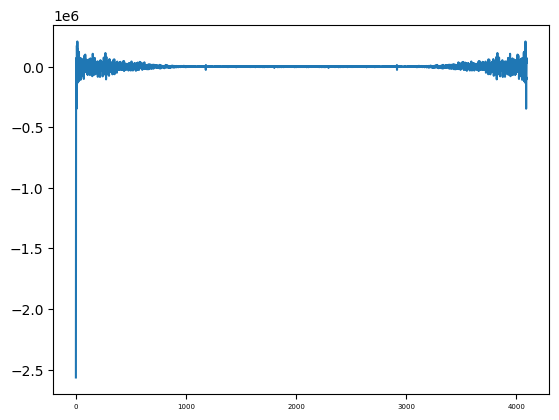

In [ ]:
setA_fft = fft(setA.sum())
plt.plot(setA_fft)

# Conjunto A vs Conjunto D
• Conjunto A: participantes saudáveis (grupo controle), acordados, relaxados, de olhos abertos.

• Conjunto D: participantes portadores de epilepsia; eletrodo próximo à zona epileptogênica.

In [ ]:
setA['classe'] = 0
setD['classe'] = 1

In [ ]:
df_final = pd.concat([setA, setD], ignore_index=True)
df_final

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,classe
0,-40,-13,43,69,55,12,7,28,39,19,...,67,79,77,40,9,-10,-21,-26,28,0
1,24,10,-9,-18,-9,-3,-2,-2,-9,-9,...,3,-17,-14,-21,-29,-39,-33,-28,-19,0
2,0,2,-1,14,36,60,80,84,86,78,...,6,17,26,34,38,32,23,21,-16,0
3,20,21,19,12,13,5,15,4,12,7,...,53,59,61,56,58,51,39,18,30,0
4,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,...,39,23,42,45,57,43,21,17,-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-24,-27,-23,-28,-34,-40,-47,-43,-38,-23,...,-15,-24,-32,-50,-70,-67,-57,-33,-52,1
196,-3,0,5,4,6,4,5,9,19,26,...,5,8,15,18,22,23,22,17,-24,1
197,-72,-78,-90,-93,-99,-99,-100,-101,-99,-103,...,-25,-28,-29,-30,-35,-35,-43,-40,-22,1
198,-7,2,12,18,27,28,34,34,33,29,...,-4,-17,-31,-37,-46,-49,-47,-44,-34,1


In [ ]:
df_final.to_csv('conjuntoA_vs_conjuntoD.csv', index=False)

In [ ]:
def create_features(df):
    df = df.drop(columns=['classe'])
    new_df = pd.DataFrame()
    for index, row in df.iterrows():
        fft_set = fft(setA.sum())
        reshaped_fft = fft_set.flatten()
        new_df = new_df.append([list(reshaped_fft)])
    return new_df

In [ ]:
%%capture
df = create_features(df_final)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,classe
0,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
1,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
2,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
3,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
4,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
196,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
197,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.74

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['classe'] = df_final['classe']

In [ ]:
df_final['classe'] = df_final['classe']

In [ ]:
df_final['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

### Treinamento

In [ ]:
X = df.drop(columns=['classe'])

In [ ]:
X = df_final.drop(columns=['classe'])

In [ ]:
y = df['classe'].values

In [ ]:
y = df_final['classe'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_train.mean())/X_train.std()

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.38      0.80      0.52        10
           1       0.89      0.57      0.69        30

    accuracy                           0.62        40
   macro avg       0.64      0.68      0.61        40
weighted avg       0.77      0.62      0.65        40



In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.62      0.93      0.74        14
           1       0.95      0.69      0.80        26

    accuracy                           0.78        40
   macro avg       0.78      0.81      0.77        40
weighted avg       0.83      0.78      0.78        40



# Conjunto A vs Conjunto C
• Conjunto A: participantes saudáveis (grupo controle), acordados, relaxados, de olhos abertos.

• Conjunto C:  participantes portadores de epilepsia; eletrodo no hemisfério oposto, formação hipocampo.

In [ ]:
setA['classe'] = 0
setC['classe'] = 1

In [ ]:
df_final = pd.concat([setA, setC], ignore_index=True)

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,classe
0,-40,-13,43,69,55,12,7,28,39,19,...,67,79,77,40,9,-10,-21,-26,28,0
1,24,10,-9,-18,-9,-3,-2,-2,-9,-9,...,3,-17,-14,-21,-29,-39,-33,-28,-19,0
2,0,2,-1,14,36,60,80,84,86,78,...,6,17,26,34,38,32,23,21,-16,0
3,20,21,19,12,13,5,15,4,12,7,...,53,59,61,56,58,51,39,18,30,0
4,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,...,39,23,42,45,57,43,21,17,-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,39,35,35,38,44,55,61,65,61,66,...,79,82,89,96,88,88,82,72,13,1
196,-31,-36,-44,-48,-52,-57,-62,-67,-73,-72,...,-64,-50,-40,-31,-30,-20,-21,-23,-47,1
197,118,121,114,106,104,93,91,68,49,26,...,-124,-115,-82,-56,-40,-20,6,5,-101,1
198,-41,-35,-28,-23,-20,-22,-28,-33,-30,-31,...,16,10,11,10,8,8,2,-7,28,1


In [ ]:
df_final.to_csv('conjuntoA_vs_conjuntoC.csv', index=False)

In [ ]:
def create_features(df):
    df = df.drop(columns=['classe'])
    new_df = pd.DataFrame()
    for index, row in df.iterrows():
        fbe = frequency_bands_energy(row, 0.2, 'hamming', 173.61, 50, diadic = True, relative_window_shift = 1.0, fft_length = -1)
        reshaped_fbe = fbe.flatten()
        new_df = new_df.append([list(reshaped_fbe)])
    return new_df

In [ ]:
def create_features(df):
    df = df.drop(columns=['classe'])
    new_df = pd.DataFrame()
    for index, row in df.iterrows():
        fft_set = fft(setA.sum())
        reshaped_fft = fft_set.flatten()
        new_df = new_df.append([list(reshaped_fft)])
    return new_df

In [ ]:
%%capture
df = create_features(df_final)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df['classe'] = df_final['classe']

In [ ]:
df_final['classe'] = df_final['classe']

In [ ]:
df['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df_final['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,classe
0,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
1,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
2,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
3,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
4,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
196,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
197,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.74

### Treinamento

In [ ]:
X = df.drop(columns=['classe'])

In [ ]:
X = df_final.drop(columns=['classe'])

In [ ]:
y = df['classe'].values

In [ ]:
y = df_final['classe'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.95      0.75      0.84        24

    accuracy                           0.82        40
   macro avg       0.83      0.84      0.82        40
weighted avg       0.85      0.82      0.83        40



In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.84      0.84      0.84        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



# Conjunto A vs Conjunto E
• Conjunto A: participantes saudáveis (grupo controle), acordados, relaxados, de olhos abertos.

• Conjunto E: participantes portadores de epilepsia, em convulsão epiléptica.

In [ ]:
setA['classe'] = 0
setE['classe'] = 1

In [ ]:
df_final = pd.concat([setA, setE], ignore_index=True)

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,classe
0,-40,-13,43,69,55,12,7,28,39,19,...,67,79,77,40,9,-10,-21,-26,28,0
1,24,10,-9,-18,-9,-3,-2,-2,-9,-9,...,3,-17,-14,-21,-29,-39,-33,-28,-19,0
2,0,2,-1,14,36,60,80,84,86,78,...,6,17,26,34,38,32,23,21,-16,0
3,20,21,19,12,13,5,15,4,12,7,...,53,59,61,56,58,51,39,18,30,0
4,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,...,39,23,42,45,57,43,21,17,-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,224,199,149,67,-37,-133,-193,-206,-197,-164,...,26,3,-27,-48,-63,-65,-56,-56,-101,1
196,-40,-58,-75,-88,-89,-81,-67,-52,-28,14,...,32,32,18,6,-3,-10,-13,-16,-151,1
197,466,481,440,360,259,158,70,-15,-99,-181,...,-28,-17,-27,-45,-70,-73,-72,-67,523,1
198,746,692,562,400,238,84,-36,-137,-211,-253,...,-776,-989,-853,-593,-89,310,565,677,11,1


In [ ]:
df_final.to_csv('conjuntoA_vs_conjuntoE.csv', index=False)

In [ ]:
def create_features(df):
    df = df.drop(columns=['classe'])
    new_df = pd.DataFrame()
    for index, row in df.iterrows():
        fbe = frequency_bands_energy(row, 0.2, 'hamming', 173.61, 50, diadic = True, relative_window_shift = 1.0, fft_length = -1)
        reshaped_fbe = fbe.flatten()
        new_df = new_df.append([list(reshaped_fbe)])
    return new_df

In [ ]:
%%capture
df = create_features(df_final)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df['classe'] = df_final['classe']

In [ ]:
df_final['classe'] = df_final['classe']

In [ ]:
df['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df_final['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,classe
0,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
1,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
2,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
3,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
4,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
196,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
197,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.74

### Treinamento

In [ ]:
X = df.drop(columns=['classe'])

In [ ]:
X = df_final.drop(columns=['classe'])

In [ ]:
y = df['classe'].values

In [ ]:
y = df_final['classe'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         9
           1       0.84      0.52      0.64        31

    accuracy                           0.55        40
   macro avg       0.56      0.59      0.52        40
weighted avg       0.72      0.55      0.59        40



In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.89      0.74      0.81        23

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40



# Conjunto A vs Conjunto B
• Conjunto A: participantes saudáveis (grupo controle), acordados, relaxados, de olhos abertos.

• Conjunto B: participantes saudáveis (grupo controle), acordados, relaxados, de olhos fechados.

In [ ]:
setA['classe'] = 0
setB['classe'] = 1

In [ ]:
df_final = pd.concat([setA, setB], ignore_index=True)

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,classe
0,-40,-13,43,69,55,12,7,28,39,19,...,67,79,77,40,9,-10,-21,-26,28,0
1,24,10,-9,-18,-9,-3,-2,-2,-9,-9,...,3,-17,-14,-21,-29,-39,-33,-28,-19,0
2,0,2,-1,14,36,60,80,84,86,78,...,6,17,26,34,38,32,23,21,-16,0
3,20,21,19,12,13,5,15,4,12,7,...,53,59,61,56,58,51,39,18,30,0
4,-2,-8,-27,-43,-39,-30,-30,-27,-35,-57,...,39,23,42,45,57,43,21,17,-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-38,-18,-18,-22,-10,-9,-22,-1,-2,-17,...,-22,-17,-22,-22,10,28,0,-52,29,1
196,71,82,62,23,-24,-46,-33,-14,1,1,...,59,44,18,-32,-94,-130,-113,-55,8,1
197,-161,-224,-239,-209,-154,-90,-9,62,105,122,...,34,57,63,60,55,62,57,50,162,1
198,-43,-30,-4,29,41,38,36,27,13,15,...,-61,-50,-21,2,13,16,-1,6,12,1


In [ ]:
df_final.to_csv('conjuntoA_vs_conjuntoB.csv', index=False)

In [ ]:
def create_features(df):
    df = df.drop(columns=['classe'])
    new_df = pd.DataFrame()
    for index, row in df.iterrows():
        fbe = frequency_bands_energy(row, 0.2, 'hamming', 173.61, 50, diadic = True, relative_window_shift = 1.0, fft_length = -1)
        reshaped_fbe = fbe.flatten()
        new_df = new_df.append([list(reshaped_fbe)])
    return new_df

In [ ]:
%%capture
df = create_features(df_final)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df['classe'] = df_final['classe']

In [ ]:
df_final['classe'] = df_final['classe']

In [ ]:
df['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df_final['classe'].value_counts()

0    100
1    100
Name: classe, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,4096,4097,classe
0,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
1,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
2,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
3,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
4,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
196,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.749171j,45226.052218+31923.246982j,33887.890980-5068.708768j,-106508.000523+10279.181198j,-85780.572118-90936.852114j,-346317.254869+21328.570019j,-141632.581906+37557.548050j,173884.481598+179067.772005j,...,173884.481598-179067.772005j,-141632.581906-37557.548050j,-346317.254869-21328.570019j,-85780.572118+90936.852114j,-106508.000523-10279.181198j,33887.890980+5068.708768j,45226.052218-31923.246982j,71406.190846+6183.749171j,30893.905291-46412.555969j,1
197,-2.565068e+06-0.000000e+00j,30893.905291+46412.555969j,71406.190846-6183.74

### Treinamento

In [ ]:
X = df.drop(columns=['classe'])

In [ ]:
X = df_final.drop(columns=['classe'])

In [ ]:
y = df['classe'].values

In [ ]:
y = df_final['classe'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_train.mean())/X_train.std()

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        17
           1       0.58      0.48      0.52        23

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.52      0.50      0.50        40



In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.53      0.53      0.53        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40

